In [1]:
%matplotlib notebook
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os

Check if you installed the LePhare package.<br>
Website : http://www.cfht.hawaii.edu/~arnouts/LEPHARE/lephare.html

In [2]:
from sedkcorr.sed_fitting import lephare

Load data.<br>
Here is an example.<br>
The columns must be [flux_ii, flux_ii.err, ..., context, z, others...], with 'ii' your bands.<br>
The 'context' number must be : sum(2**[band_nb]). For example, bands = ["u", "g", "r", "i", "z"] (bands_nb = [0, 1, 2, 3, 4]) :
- context = 31 --> ["u", "g", "r", "i", "z"]
- context = 30 --> ["g", "r", "i", "z"]
- context = 15 --> ["u", "g", "r", "i"]
- context = 25 --> ["u", "i", "z"]

The 'z' is the redshift.<br>
In 'others' you can put a column with the SN names for example.

In [3]:
ROOT = "../test/lephare/"
data_lp = pandas.read_csv(ROOT+"data_test.csv", sep=" ")
data_lp

,sdss_flux_1.5kpc_u,sdss_flux_1.5kpc_u.err,ps_flux_1.5kpc_g,ps_flux_1.5kpc_g.err,ps_flux_1.5kpc_r,ps_flux_1.5kpc_r.err,ps_flux_1.5kpc_i,ps_flux_1.5kpc_i.err,ps_flux_1.5kpc_z,ps_flux_1.5kpc_z.err,CONTEXT,Z-SPEC,STRING
0,1.227194e-17,4.928681e-18,1.389326e-17,6.902862e-20,8.659294e-18,2.922806e-20,9.346882e-18,4.667556e-20,3.230372e-18,2.169672e-20,31,0.03185,2007aj
1,3.189998e-17,4.026194e-18,7.381098e-17,1.799055e-19,7.192829e-17,9.228955e-20,8.032923e-17,1.650248e-19,6.790159e-17,9.719448e-20,31,0.03509,2002G
2,6.248074e-16,7.136033e-18,1.801086e-15,1.164064e-18,2.002177e-15,4.736618e-19,2.109367e-15,8.014284e-19,1.743491e-15,4.585604e-19,31,0.02824,ASASSN-15la


### Create a python wrapper object of LePhare.

In [4]:
lp_fit = lephare.LePhareSEDFitter()

### Initialization. (set_data)

In [16]:
print(lp_fit.set_data.__doc__)


        Set up the file paths about the data, the config files (input and output) and the results path.
        
        Parameters
        ----------
        data : [string or pandas.DataFrame or dict]
            Path of the data file or a DataFrame/dict, both of them in a format readable by LePhare fitter.
            
        filters : [list(string) or None]
            List of filters of the given measurements, the 'FILTER_LIST' parameter in the configuration file will be changed to the corresponding list of LePhare file names.
            The filter syntax must be like "project.band" (ex: 'sdss.r', 'galex.FUV', 'ps1.g', ...).
            If None, the filter list will be based on the configuration file.
        
        input_param_file : [string or None]
            Path of the input parameter file.
            If 'None', the default file is imported from the package ('/config/lephare_zphot_input.para').
        
        output_param_file : [string or None]
            Path of t

In [5]:
lp_fit.set_data(data=data_lp, 
                input_param_file=ROOT+"lephare_zphot_input.para", 
                results_path=ROOT+"data_test_lephare_res.out", 
                flux_unit="AA", 
                filters=["sdss.u", "ps1.g", "ps1.r", "ps1.i", "ps1.z"])

WARNING!!! Don't forget to check the "ERR_SCALE" parameter from the configuration file.
 You can check it with '.describe_params("ERR_SCALE")'. It must has the same size than the given 'filters'.


You can check the configuration parameters :

In [8]:
lp_fit.describe_params("input")

STAR_SED : $LEPHAREDIR/sed/STAR/STAR_MOD.list (comented? : False)
STAR_FSCALE : 3.432E-09 (comented? : False)
STAR_LIB : LIB_STAR_sdss_ps1 (comented? : False)
QSO_SED : $LEPHAREDIR/sed/QSO/QSO_MOD.list (comented? : False)
QSO_FSCALE : 1 (comented? : False)
QSO_LIB : LIB_QSO_sdss_ps1 (comented? : False)
GAL_SED : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_MOD.list (comented? : False)
GAL_FSCALE : 1. (comented? : False)
GAL_LIB : LIB_BC03_sdss_ps1 (comented? : False)
SEL_AGE : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_AGE.list (comented? : False)
AGE_RANGE : 0.,13.55e9 (comented? : False)
FILTER_LIST : sdss/up.pb,ps1/g_ps.pb,ps1/r_ps.pb,ps1/i_ps.pb,ps1/z_ps.pb (comented? : False)
TRANS_TYPE : 0 (comented? : False)
FILTER_CALIB : 0 (comented? : False)
FILTER_FILE : sdss_ps1.filt (comented? : False)
STAR_LIB_IN : LIB_STAR_sdss_ps1 (comented? : False)
STAR_LIB_OUT : STAR_sdss_ps1 (comented? : False)
QSO_LIB_IN : LIB_QSO_sdss_ps1 (comented? : False)
QSO_LIB_OUT : QSO_sdss_ps1 (comented? : False)
GAL_LIB_IN

You can check if the data are now in a LePhare compatible format, regarding the columns and the flux unit (erg / cm^2 / s^1 / Hz^1).

In [9]:
lp_fit.data_meas

,flux_sdss.u,flux_sdss.u.err,flux_ps1.g,flux_ps1.g.err,flux_ps1.r,flux_ps1.r.err,flux_ps1.i,flux_ps1.i.err,flux_ps1.z,flux_ps1.z.err,CONTEXT,Z-SPEC,STRING_0
0,5.193158e-29,2.085687e-29,1.097532e-28,5.453081e-31,1.115548e-28,3.765353e-31,1.774674e-28,8.862195e-31,8.117480e-29,5.452088e-31,31,0.03185,2007aj
1,1.349922e-28,1.703778e-29,5.830875e-28,1.421206e-30,9.266279e-28,1.188935e-30,1.525195e-27,3.133292e-30,1.706274e-27,2.442364e-30,31,0.03509,2002G
2,2.644019e-27,3.019779e-29,1.422811e-26,9.195803e-30,2.579337e-26,6.102025e-30,4.005012e-26,1.521656e-29,4.381153e-26,1.152299e-29,31,0.02824,ASASSN-15la


### Run the fit

Can take time the first time you launch it, as it has to create the template files...
But then, if you relaunch it, will be fast, unless 'update' attribute is True.

In [10]:
lp_fit.run_fit(update=False)

### Plot the SED

Plot the given 'id_sed', corresponding to the input data indexes.<br>
There are several options, you can check the docstring.
You now how to use 'savefile'.

<IPython.core.display.Javascript object>


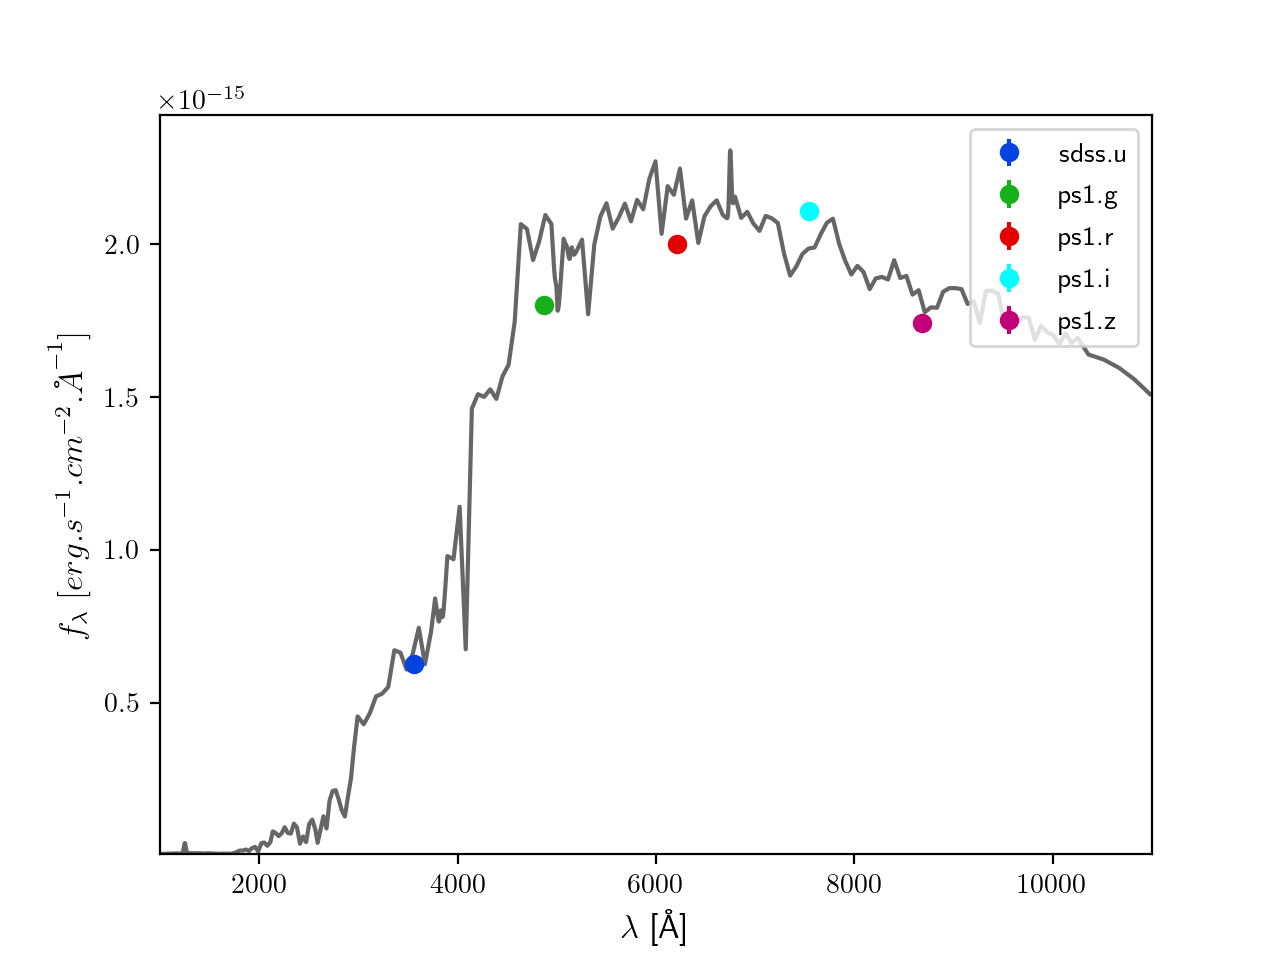

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x181947aa90>,
 'fig': <Figure size 640x480 with 1 Axes>}

In [13]:
lp_fit.show(id_sed=2, y_unit="AA", plot_phot=True, xlim=(1000, 11000), ylim=(None, None), 
            savefile=None, xscale="linear", yscale="linear")

### LePhare results

Here are the results, writen in the 'results_path' file.

In [11]:
lp_fit.data_res

,IDENT,Z_BEST,CHI_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,DIST_MOD_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MASS_MED,MASS_SUP,SFR_BEST,SFR_INF,SFR_MED,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_MED,SSFR_SUP
0,0,0.0319,562.6190,1,1,0.06,35.7280,5,-99.0,1.000000e+09,...,-99.00000,-99.0000,-1.68204,-99.00000,-99.00000,-99.00000,-8.13408,-99.0000,-99.0000,-99.0000
1,1,0.0351,40.8484,6,1,0.20,35.9436,5,-99.0,1.000000e+09,...,8.85714,8.9403,-1.38686,-1.61979,-1.45637,-1.31665,-10.31650,-10.4625,-10.2952,-10.1666
2,2,0.0282,23.5159,19,1,0.14,35.4610,5,-99.0,1.000000e+09,...,10.09130,10.3689,-5.65547,-5.58763,-2.66042,-1.54985,-15.58040,-16.4447,-15.5375,-11.7170
